<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter4/AggCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
!rm clusterdata.*
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv

Python 3.7.12
--2021-10-26 09:18:01--  https://raw.github.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv [following]
--2021-10-26 09:18:01--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter4/clusterdata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4832 (4.7K) [text/plain]
Saving to: ‘clusterdata.csv’

clusterdata.csv     100%[===================>]   4.72K  --.-KB/s    in 0s      

2021-10-26 09:18:

# Example 3.5
## Import modules

In [2]:
import numpy as np 
from scipy.spatial.distance import cdist
import scipy
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(120)

## Original Program

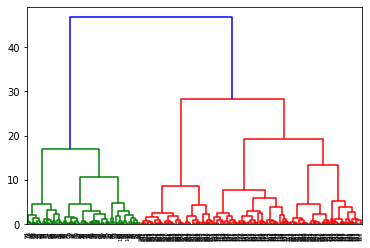

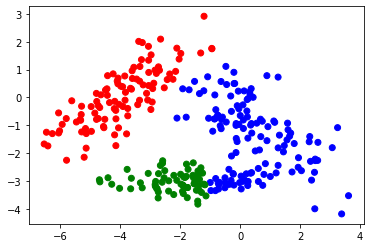

In [4]:
def update_distances(D,i,j, sizes): # calculate distances for merged cluster
    n = D.shape[0]     
    d = np.inf * np.ones(n+1)
    for k in range(n): # Update distances     
       d[k] = ((sizes[i]+sizes[k])*D[i,k] + 
       (sizes[j]+sizes[k])*D[j,k] - 
       sizes[k]*D[i,j])/(sizes[i] + sizes[j] + sizes[k])
                   
    infs =  np.inf * np.ones(n) # array of infinity
    D[i,:],D[:,i],D[j,:],D[:,j] =  infs,infs,infs,infs # deactivate 
    new_D = np.inf * np.ones((n+1,n+1))
    new_D[0:n,0:n] = D # copy old matrix into new_D
    new_D[-1,:], new_D[:,-1] = d,d # add new row and column
    return new_D
            
def agg_cluster(X):  
    n = X.shape[0]
    sizes = np.ones(n)
    D = cdist(X, X,metric = 'sqeuclidean')   # initialize distance matr.
    np.fill_diagonal(D, np.inf * np.ones(D.shape[0]))    
    Z = np.zeros((n-1,4))  #linkage matrix encodes hierachy tree
    for t in range(n-1):
        i,j = np.unravel_index(D.argmin(), D.shape) # minimizer pair
        sizes = np.append(sizes, sizes[i] + sizes[j])
        Z[t,:]=np.array([i, j, np.sqrt(D[i,j]), sizes[-1]]) 
        D = update_distances(D, i,j, sizes)  # update distance matr.
    return Z   
    
# MAIN ROUTINE
import scipy.cluster.hierarchy as h 

X = np.genfromtxt('clusterdata.csv',delimiter=',') # read the data
Z = agg_cluster(X)  # form the linkage matrix

#h.set_link_color_palette(['m', 'c', 'y', 'k'])
h.dendrogram(Z) # SciPy can produce a dendogram from Z 
# fcluster function assigns cluster ids to all points based on Z 
cl = h.fcluster(Z, criterion = 'maxclust', t=3) 

import matplotlib.pyplot as plt
plt.figure(2), plt.clf()
cols = ['red','green','blue']
colors = [cols[i-1] for i in cl]
plt.scatter(X[:,0], X[:,1],c=colors)
plt.show()